In [38]:
# In this exercise we'll examine a learner which has high variance, and tries to learn
# nonexistant patterns in the data.
# Use the learning curve function from sklearn.learning_curve to plot learning curves
# of both training and testing error.
# CODE YOU HAVE TO TYPE IN IS IN LINE 35
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
# PLEASE NOTE:
# In sklearn 0.18, the import would be from sklearn.model_selection import learning_curve
# from sklearn.learning_curve import learning_curve # sklearn version 0.17
from sklearn.model_selection import learning_curve#我这儿是0.18版本的
from sklearn.cross_validation import KFold
from sklearn.metrics import explained_variance_score, make_scorer
import numpy as np

# Set the learning curve parameters; you'll need this for learning_curves
#曲线参数
size = 1000
cv_out = KFold(size,shuffle=True)
score = make_scorer(explained_variance_score)

# Create a series of data that forces a learner to have high variance
X = np.round(np.reshape(np.random.normal(scale=5,size=2*size),(-1,2)),2)
y = np.array([[np.sin(x[0]+np.sin(x[1]))] for x in X])

def plot_curve():
    # Defining our regression algorithm
    reg = DecisionTreeRegressor()
    # Fit our model using X and y
    reg.fit(X,y)
    print "Regressor score: {:.4f}".format(reg.score(X,y))

    
#      learning_curve(
#         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
# 这里estimator是我们正在用来预测的模型，例如它可以是GaussianNB()，X和y是特征和目标。cv是交叉验
# 证生成器，例如KFold()，'n_jobs'是平行运算的参数，train_sizes是多少数量的训练数据用来生成曲线。

    # TODO: Use learning_curve imported above to create learning curves for both the
    #       training data and testing data. You'll need reg, X, y, cv and score from above.
    size = [3,6,110,121,313,19,21,324,95,6]
    train_sizes, train_scores, test_scores = learning_curve(reg, X, y,n_jobs = 1, cv = cv_out,train_sizes = size)
    print train_sizes, train_scores, test_scores

    # Taking the mean of the test and training scores
    train_scores_mean = np.mean(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    

    # Plotting the training curves and the testing curves using train_scores_mean and test_scores_mean 
    plt.plot(train_sizes ,train_scores_mean,'-o',color='b',label="train_scores_mean")
    plt.plot(train_sizes,test_scores_mean ,'-o',color='r',label="test_scores_mean")

    # Plot aesthetics
    plt.ylim(-0.1, 1.1)
    plt.ylabel("Curve Score")
    plt.xlabel("Training Points")
    plt.legend(bbox_to_anchor=(1.1, 1.1))
    plt.show()
    


Regressor score: 1.0000
[  3   6  19  21  95 110 121 313 324] [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] [[-1.97085032 -1.00828665 -1.66944052]
 [-1.18111902 -1.36831807 -1.05538419]
 [-0.19374361 -0.52071869 -0.35596207]
 [-0.11232049 -0.55429662 -0.42089276]
 [ 0.31047772  0.34128228  0.05234841]
 [ 0.32104673  0.24354513  0.07017973]
 [ 0.32021288  0.2238596   0.14763115]
 [ 0.46599778  0.29602488  0.26081626]
 [ 0.43839427  0.35983718  0.36017631]]


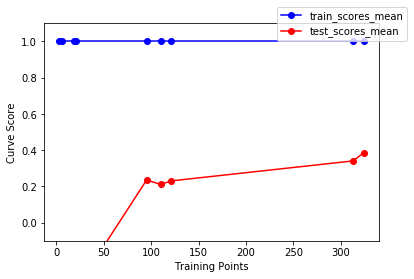

In [39]:
plot_curve()